In [1]:
import pandas as pd
import numpy as np

ex = pd.read_excel("data/basic/expected.xlsx", index_col = 0, usecols = "B:E")
ex

,Unnamed: 1,선수 A,선수 B
선수 성적별 인센티브,,,
NaN,NaN,성적 확률,성적 확률
우승,300.0,0.58,0.65
순위 상승,150.0,0.87,0.51
성적 동일,0.0,0.55,0.45
성적 하락,-100.0,0.05,0.05
기대값,NaN,299.5,266.5
기대값의 분산,NaN,76760,46327.4


In [2]:
ex = ex.iloc[1:5, :]
ex

,Unnamed: 1,선수 A,선수 B
선수 성적별 인센티브,,,
우승,300.0,0.58,0.65
순위 상승,150.0,0.87,0.51
성적 동일,0.0,0.55,0.45
성적 하락,-100.0,0.05,0.05


In [19]:
# 기대값을 처리하는 함수
result = 0
def expected(data):
    global result
    result += data[0] * data[1] #인센 * 성적
    return result

ins = [ex.iloc[n, 0] for n in range(4)]
ins      #[300.0, 150.0, 0.0, -100.0]

a = [ex.iloc[n, 1] for n in range(4)]
b = [ex.iloc[n, 2] for n in range(4)]

In [20]:
tup1 = []

for i in zip(ins, a):
    tup1.append(i)
    
    
tup2 = []

for i in zip(ins, b):
    tup2.append(i)
    
a_e = list(map(expected, tup1))
result = 0
b_e = list(map(expected, tup2))

print("A선수의 기대값: ", a_e[3])
print("B선수의 기대값: ", b_e[3])

A선수의 기대값:  299.5
B선수의 기대값:  266.5


In [21]:
# 분산
a_var, b_var = 0, 0

for n in range(4):
    a_var += ((ex.iloc[n, 0] - a_e[3])**2)*ex.iloc[n, 1] 
    b_var += ((ex.iloc[n, 0] - b_e[3])**2)*ex.iloc[n, 2]
    
print("A선수의 분산: ", a_var)
print("B선수의 분산: ", b_var)

A선수의 분산:  76760.0125
B선수의 분산:  46327.435000000005


# 정규 분포
    A는 서울에서 부산까지 KTX의 운행시간을 100회 측정하여 평균을 170분, 표준 편차를 10분으로 측정했다. 
    무작위로 KTX를 이용했을 때, 185분보다 더 오래 걸릴 확률을 구하라

    새로운 확률변수를 다음과 같이 구해본다.
    z = (어떤 특정한 날에 이용하는 걸릴 시간 - 평균) / 표준편차

In [23]:
z = (185 - 170) / 10 
z

1.5

    P(Z > 1.5) 누적 확률을 구한다. (https://en.wikipedia.org/wiki/Standard_normal_table)
    1 - 1.5의 누적확율은 0.93319 = 0.066807 -> 6.6%

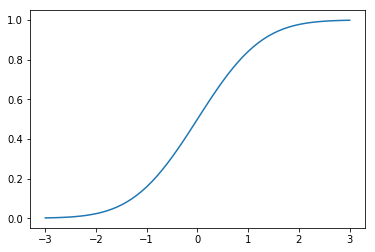

In [39]:
import math
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats

ex = pd.read_excel("data/basic/norm.xlsx", usecols = "B")

cum = []
def cum_norm(x):
    cum.extend(sp.stats.norm.cdf(x))
    
ex.apply(cum_norm)
ex['누적확률분포'] = cum


result = sp.stats.norm.cdf(1.5)

plt.plot(ex['구간'], ex['누적확률분포'])
plt.show()

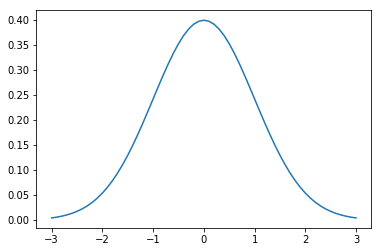

In [40]:
def norm(x, mu = 0, sigma = 1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu)**2/2/sigma**2) /(sqrt_two_pi * sigma))

dist = []
dist.extend(ex['구간'].apply(norm))
ex['확률분포'] = dist

plt.plot(ex['구간'], ex['확률분포'])
plt.show()

In [43]:
# 이항 분포
n = 49
r = 2
p = 0.1

def nCr(n, r):
    f = math.factorial
    return f(n) / f(r) / f(n-r)

result = nCr(n, r) * (p**r) *((1-p)**(n-r))
print(result)


# scipy 패키지 이용
# pmf(확률질량함수), pdf(확률밀도함수)
rv = sp.stats.binom(n, p)
result = rv.pmf(r)
print(result)

0.08313908976417642
0.08313908976417336


# 가설 검정

In [10]:
import pandas as pd
import numpy as np
import math
import scipy as sp
import scipy.stats

ex = pd.read_excel('data/basic/hy.xlsx', usecols = 'C:Q')
ex = ex.iloc[:1, :]
ex = pd.DataFrame(list(ex.iloc[0]))
ex

,0
0,308.0
1,302.0
2,290.0
3,292.0
4,327.0
5,290.0
6,320.0
7,285.0
8,315.0
9,285.0


In [12]:
hypo = 300
mean = ex.mean()[0]
std = ex.std()[0]

t_result = (mean - hypo) / (std/math.sqrt(15))
print('검정 통계량: ', t_result)

another = sp.stats.ttest_1samp(list(ex[0]), 300)
print('또 다른 검정통계량: ', another)

검정 통계량:  0.5680615441798167
또 다른 검정통계량:  Ttest_1sampResult(statistic=0.5680615441798167, pvalue=0.5789907508807801)
